# Interactive data analysis in Jupyter

Jupyter is a data-driven document. You can write code, plot data, explain results, and display some math all in a single coherent document. Try it out!

In [2]:
from IPython.display import display

def Fasta(data=''):
    bundle = {}
    bundle['application/vnd.fasta.fasta'] = data
    bundle['text/plain'] = data
    display(bundle, raw=True)


with open("data/s100.fasta", "r") as f:
    Fasta(f.read())

>F6SKV0_MONDO/30-424
D-PVSSWGRFGQDDDGLDDSLLELSEGEEDDGHFSYTEEEIQELLKDDDSLNEQSL--GG
LRKDTGGQAE--KLENYSCISFDSPQDI--NVLCSTGPRAGPASIHNLPQKNIPARHAPI
PTKSPSRHFVSEKNLLKITLVPPFNTTVCDA-FGPKET---ESSSKDGSSNANCLGTPSS
LEKDVNREGHGQNDGKLCTKE--ISSACSVWKGTP---PPKAGPPQGPPRANTPICEESV
PVASPTLGPTPRPD-VALSSGNDG-HKLGDTARSPAVQSSS-TKPVKLDKDSKKKEGYER
RLGKVIPLQLAKARSKIQTFSKTELEQKKQIYLKNVIAHLKNPLESNQGALGELCALMDQ
VANGEYQKQNQRWQHPSDLTMRNYPRFRQKPLQRYSLTQWVDRNLRSHRRFQGL
>G3WF27_SARHA/29-413
NVPISSWGRFGLDEDGLDDSLLELSEGEEDDGHFSYTEEEIQELLKDDDSLNEQSL--GG
LRKDTGGDPE--KLGSCSCASFDSPQDI--NVLCSLGPRAGPASIHKLPQISTPASHAPS
-----SRHFVPEKSLLKITVVPPFNSTVCDDMLGPKKT---EFSSKDGSSNAYYLG-ISS
LKEDVSKEDHGQNDGKLCTKE--ISSTCSVWEGPQ---PHKAGPSQGAPRASGPSCEESV
PLASPTLEQSQRQE-VALSSGNGG-HKLGD------ASVHS-TKLVRLDMDSEQKEGYER
RLGKVIPLLQARARSKIQTFSQTELEQKKQIYLKNVIAHLKHPLESNQGTLGEFYALMDQ
VANVEYHMQHQRWQHPSDLTMRNYPRFRQKPLLRYSLTQWVDRNLRSHRRFQGL
>L9JDF8_TUPCH/21-405
SAPFS-SS--SLDEDGLDDSLLELSDGEEDDGHFSYTEEEIEELLKDDDLLDEHIPREAG
LCKDDSGRDE--KGERGGHILLDIPQEK--NSLY

## Random walks visualization

In [3]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(0)

n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

locations

,id,x,y
0,0,1.764052,-2.552990
1,1,0.400157,0.653619
2,2,0.978738,0.864436
3,3,2.240893,-0.742165
4,4,1.867558,2.269755
5,5,-0.977278,-1.454366
6,6,0.950088,0.045759
7,7,-0.151357,-0.187184
8,8,-0.103219,1.532779
9,9,0.410599,1.469359


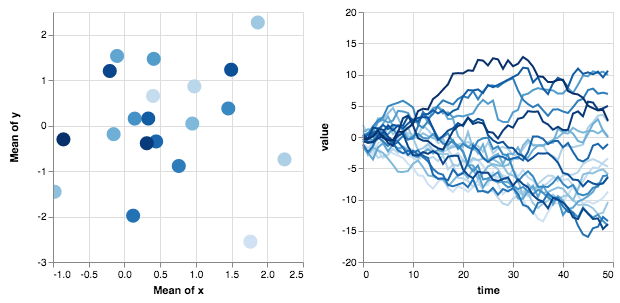

In [4]:
# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
).interactive()

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

## Analyzing seattle Weather interactively

In [5]:
from vega_datasets import data

data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


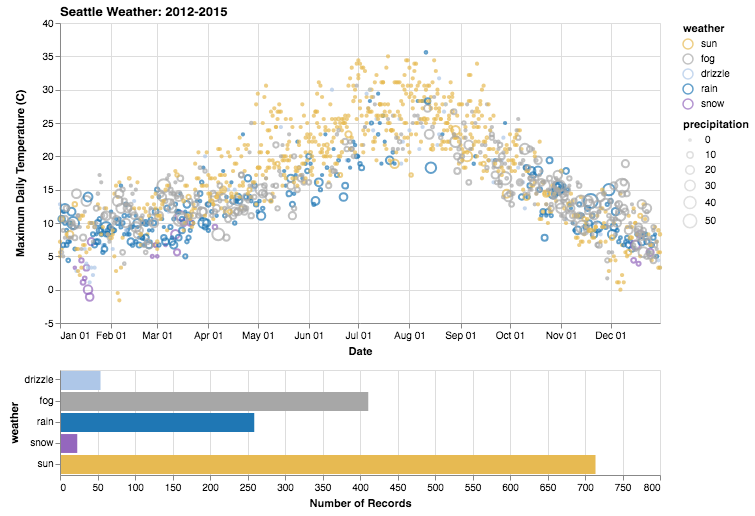

In [6]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', axis=alt.Axis(title='Date')),
    alt.Y('temp_max:Q',
        axis=alt.Axis(title='Maximum Daily Temperature (C)'),
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=600,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=600,
).add_selection(
    click
)

alt.vconcat(points, bars,
    data=data.seattle_weather.url,
    title="Seattle Weather: 2012-2015"
)